First 5 rows of dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

K=1
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.

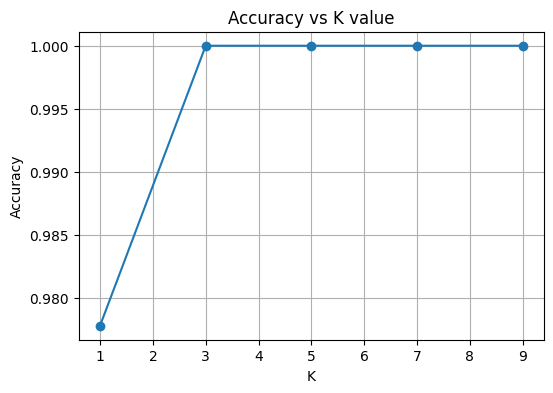

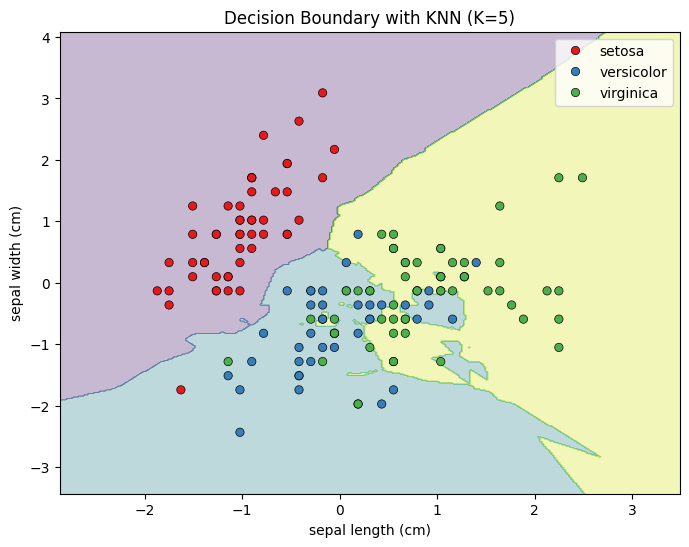

In [9]:
# Task 6: K-Nearest Neighbors (KNN) Classification
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset (Iris Dataset)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for better understanding
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("First 5 rows of dataset:\n", df.head())

# 2. Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Experiment with different values of K
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"\nK={k}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Plot accuracy vs K
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs K value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# 5. Visualize Decision Boundaries (using only 2 features for 2D plot)
X_2d = X_scaled[:, :2]  # take first two features
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)

knn2d = KNeighborsClassifier(n_neighbors=5)
knn2d.fit(X_train2d, y_train2d)

# Create meshgrid for decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=iris.target_names[y], palette="Set1", edgecolor="k")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Boundary with KNN (K=5)")
plt.show()